## **Group 10:** *Machine Learning approach to predict autism spectrum disorder* 

In [54]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Exploratory Data Analysis**

In [55]:
#Import the dataset
url = "https://raw.githubusercontent.com/vidhishah19/autism_spectrum/main/Autism_Data.csv"

#Read the csv
data = pd.read_csv(url)

In [56]:
#Defining the number or rows and columns
print(data.shape)

(1100, 21)




> Dataset consists of 1100 rows and 21 columns.



In [57]:
#Handling null values
data = pd.read_csv(url, na_values=['?'])
data.isnull().sum()

age                  6
gender               0
ethnicity          144
jundice              0
autism               0
relation           144
contry_of_res        0
used_app_before      0
age_desc             0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
result               0
Class                0
dtype: int64

In [58]:
#Displaying the dataset
data

,age,gender,ethnicity,jundice,autism,relation,contry_of_res,used_app_before,age_desc,A1_Score,...,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,Class
0,6.0,m,Others,no,no,Parent,Jordan,no,'4-11 years',1,...,0,0,1,1,0,1,0,0,5,NO
1,6.0,m,'Middle Eastern ',no,no,Parent,Jordan,no,'4-11 years',1,...,0,0,1,1,0,1,0,0,5,NO
2,6.0,m,NaN,no,no,NaN,Jordan,yes,'4-11 years',1,...,0,0,0,1,1,1,0,0,5,NO
3,5.0,f,NaN,yes,no,NaN,Jordan,no,'4-11 years',0,...,0,0,1,1,0,0,0,1,4,NO
4,5.0,m,Others,yes,no,Parent,'United States',no,'4-11 years',1,...,1,1,1,1,1,1,1,1,10,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,25.0,f,White-European,no,no,Self,Russia,no,'18 and more',0,...,0,1,1,0,1,1,1,1,7,YES
1096,34.0,m,Hispanic,no,no,Parent,Mexico,no,'18 and more',1,...,0,0,0,0,0,1,0,1,3,NO
1097,24.0,f,NaN,no,no,NaN,Russia,no,'18 and more',1,...,1,1,1,0,1,1,0,1,7,YES
1098,35.0,m,'South Asian',no,no,Self,Pakistan,no,'18 and more',1,...,0,1,1,0,1,0,1,1,6,NO


In [59]:
#Print out a description of the dataframe
data.describe()

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,1094.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,22.073126,0.699091,0.482727,0.551818,0.530000,0.587273,0.443636,0.477273,0.605455,0.412727,0.621818,5.411818
std,16.879373,0.458862,0.499929,0.497534,0.499326,0.492548,0.497039,0.499710,0.488975,0.492548,0.485154,2.523492
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,21.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000
75%,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.250000
max,383.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [60]:
data.nunique()

age                59
gender              2
ethnicity          12
jundice             2
autism              2
relation            6
contry_of_res      89
used_app_before     2
age_desc            4
A1_Score            2
A2_Score            2
A3_Score            2
A4_Score            2
A5_Score            2
A6_Score            2
A7_Score            2
A8_Score            2
A9_Score            2
A10_Score           2
result             11
Class               2
dtype: int64



> All other features except age and country_of_res have sufficiently low cardinality to one-hot encode them.



In [61]:
#Drop unwanted columns
data = data.drop(['age_desc', 'used_app_before', 'relation', 'result'], axis=1)

In [62]:
#Rename the columns
data.rename(columns = {'jundice':'jaundice', 'contry_of_res':'country_of_res'}, inplace = True)

In [63]:
#Displaying concise summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1094 non-null   float64
 1   gender          1100 non-null   object 
 2   ethnicity       956 non-null    object 
 3   jaundice        1100 non-null   object 
 4   autism          1100 non-null   object 
 5   country_of_res  1100 non-null   object 
 6   A1_Score        1100 non-null   int64  
 7   A2_Score        1100 non-null   int64  
 8   A3_Score        1100 non-null   int64  
 9   A4_Score        1100 non-null   int64  
 10  A5_Score        1100 non-null   int64  
 11  A6_Score        1100 non-null   int64  
 12  A7_Score        1100 non-null   int64  
 13  A8_Score        1100 non-null   int64  
 14  A9_Score        1100 non-null   int64  
 15  A10_Score       1100 non-null   int64  
 16  Class           1100 non-null   object 
dtypes: float64(1), int64(10), object(

In [64]:
#Datatype Handling
data.dtypes

age               float64
gender             object
ethnicity          object
jaundice           object
autism             object
country_of_res     object
A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
Class              object
dtype: object

In [65]:
#Total number of records
n_records = len(data.index)

#Number of records where individual's with ASD
n_asd_yes = len(data[data['Class'] == 'YES'])

#Number of records where individual's with no ASD
n_asd_no = len(data[data['Class'] == 'NO'])

#Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print ("Total number of records:", n_records)
print ("Individuals diagonised with ASD:", n_asd_yes)
print ("Individuals not diagonised with ASD:", n_asd_no)
print ("Percentage of individuals diagonised with ASD:", yes_percent)

Total number of records: 1100
Individuals diagonised with ASD: 393
Individuals not diagonised with ASD: 707
Percentage of individuals diagonised with ASD: 35.72727272727273


NO     707
YES    393
Name: Class, dtype: int64




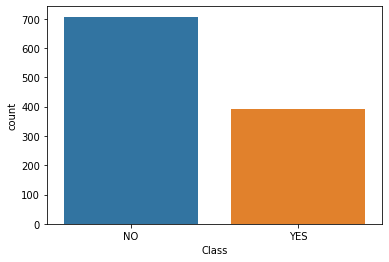

In [66]:
#Classifying countplot for person suffering from ASD 
print(data['Class'].value_counts())
print("\n")
sns.countplot(data['Class'])

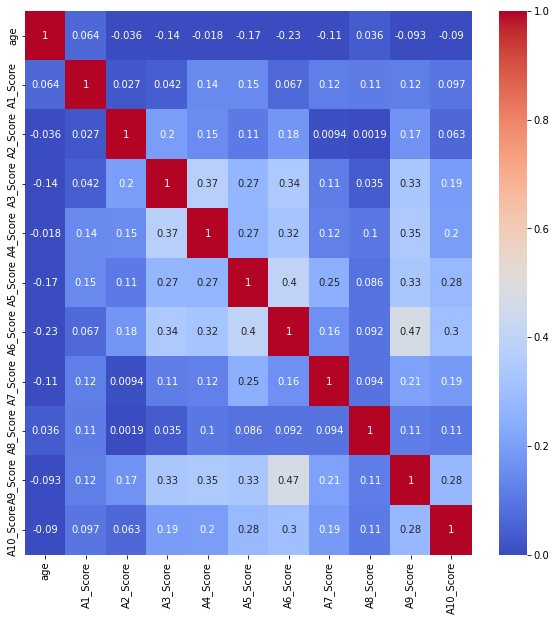

In [67]:
#Plotting Corrplot of the columns in dataset
ig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1)

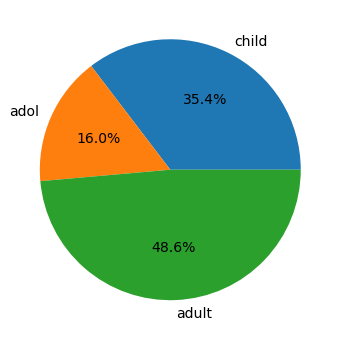

In [68]:
#Plotting pie chart of people suffering from autism spectrum of different age group
child = []
adol = []
adult = []

ages = data.iloc[:,0].tolist()
ads = data.iloc[:,-1].tolist()

for index in range(len(ages)):
  if ads[index] == 'YES':
    if ages[index] <= 11:
      child.append(ages[index])
    elif ages[index] > 11 and ages[index] <= 16:
      adol.append(ages[index])
    else:
      adult.append(ages[index])

y = np.array([len(child), len(adol), len(adult)])

fig = plt.figure(figsize=(20,6))
plt.pie(y,labels=["child", "adol", "adult"], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

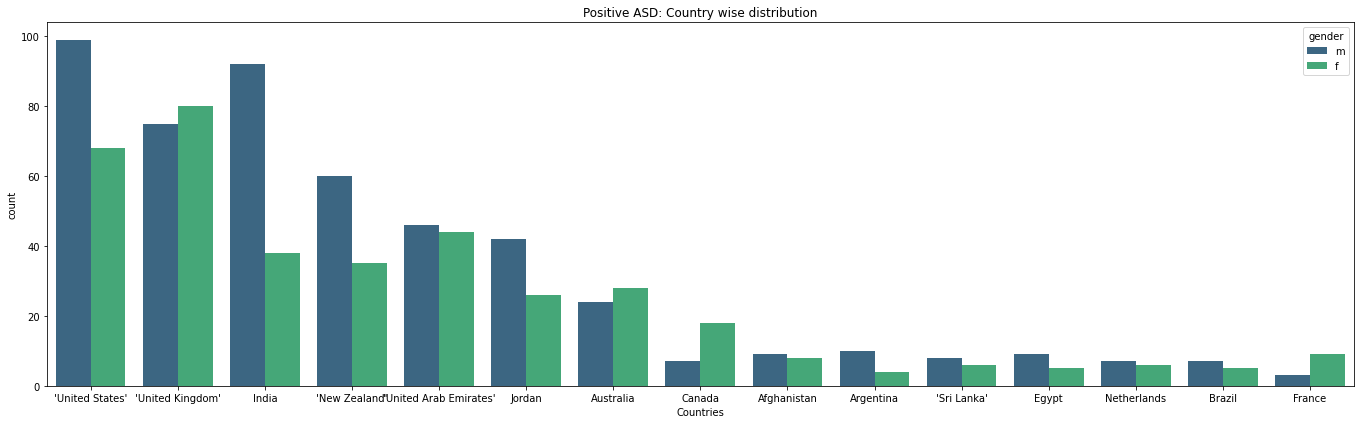

In [69]:
#Visualize positive ASD positive Adults based on top 15 countries
plt.figure(figsize=(19,6))
sns.countplot(x='country_of_res',data = data, order= data['country_of_res'].value_counts().index[:15],hue='gender',palette='viridis')
plt.title('Positive ASD: Country wise distribution')
plt.xlabel('Countries')
plt.tight_layout()

In [70]:
#Ethnicity value counts
data['ethnicity'].value_counts()

White-European       381
Asian                185
'Middle Eastern '    127
Black                 65
'South Asian'         60
Others                56
Latino                33
Hispanic              25
Pasifika              14
Turkish                8
Middle Eastern '       1
others                 1
Name: ethnicity, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

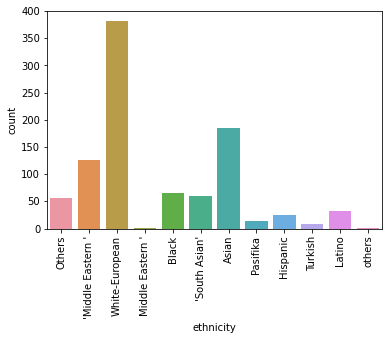

In [71]:
#Plot for the Ethnicity
sns.countplot(data['ethnicity'])
plt.xticks(rotation=90)

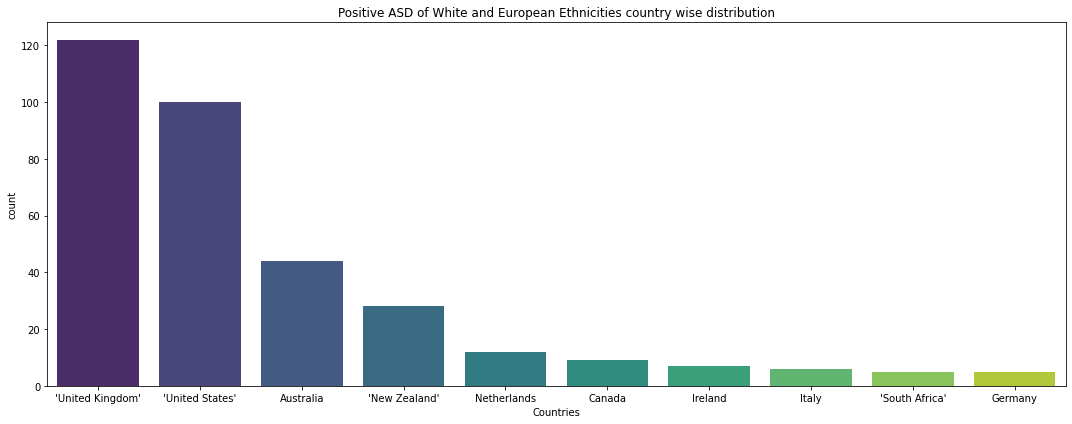

In [72]:
#Positive ASD of White and European Ethnicities country wise distribution
plt.figure(figsize=(15,6))
sns.countplot(x='country_of_res',data = data[data['ethnicity']=='White-European'], order = data[data['ethnicity']=='White-European']['country_of_res'].value_counts().index[:10],palette='viridis')
plt.title('Positive ASD of White and European Ethnicities country wise distribution')
plt.xlabel('Countries')
plt.tight_layout()



> From the above code we are considering both country and ethnicity because the reports suggests so.



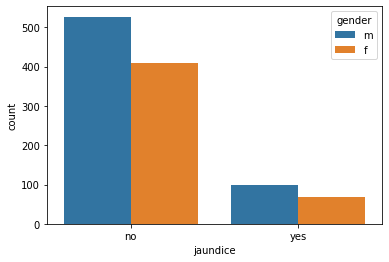

In [73]:
#Countplot of ASD positive born with Jaundice based on gender 
sns.countplot(x = 'jaundice', hue = 'gender', data = data)

Text(0.5, 1.0, 'Age distribution of ASD positive')

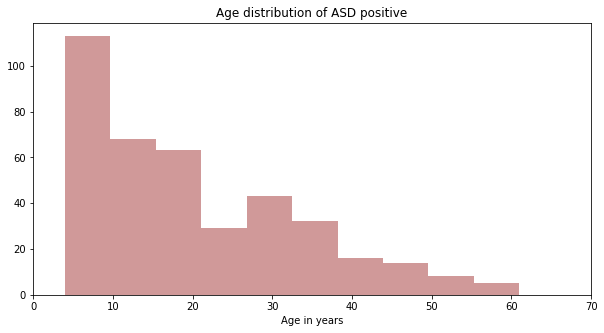

In [74]:
#Age distribution of ASD positive
data1 = data[data['Class'] == 'YES']
plt.figure(figsize = (10,5))
sns.distplot(data1['age'], kde = False, color = 'darkred')
plt.xlim(0,70)
plt.xlabel('Age in years')
plt.title('Age distribution of ASD positive')

Text(0.5, 0, 'Relatives with ASD')

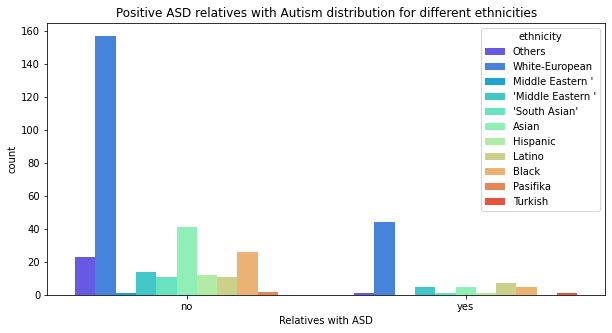

In [75]:
#Visualize the distribution of autism in family within different ethnicity
plt.figure(figsize = (10,5))
sns.countplot(x = 'autism', data = data1, hue = 'ethnicity', palette = 'rainbow')
plt.title('Positive ASD relatives with Autism distribution for different ethnicities')
plt.xlabel('Relatives with ASD')

## **Data Preprocessing**

In [76]:
#Importing Library
from sklearn.model_selection import train_test_split

In [77]:
data.dropna(inplace=True)
data.isnull().sum()

age               0
gender            0
ethnicity         0
jaundice          0
autism            0
country_of_res    0
A1_Score          0
A2_Score          0
A3_Score          0
A4_Score          0
A5_Score          0
A6_Score          0
A7_Score          0
A8_Score          0
A9_Score          0
A10_Score         0
Class             0
dtype: int64

In [78]:
data = pd.get_dummies(data, columns = ['ethnicity', 'autism', 'Class', 'gender', 'jaundice', 'country_of_res'])
data

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,country_of_res_Romania,country_of_res_Russia,country_of_res_Serbia,country_of_res_Spain,country_of_res_Sweden,country_of_res_Syria,country_of_res_Tonga,country_of_res_Turkey,country_of_res_Ukraine,country_of_res_Uruguay
0,6.0,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6.0,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,5.0,1,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,5.0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,27.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1095,25.0,0,1,0,1,1,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1096,34.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1098,35.0,1,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [79]:
#Create X and y dataset
X = data.iloc[:,:-1].values
y = data.iloc[:,16].values

In [80]:
#Displaying X values
X

array([[ 6.,  1.,  1., ...,  0.,  0.,  0.],
       [ 6.,  1.,  1., ...,  0.,  0.,  0.],
       [ 5.,  1.,  1., ...,  0.,  0.,  0.],
       ...,
       [34.,  1.,  0., ...,  0.,  0.,  0.],
       [35.,  1.,  0., ...,  0.,  0.,  0.],
       [26.,  1.,  0., ...,  0.,  0.,  0.]])

In [81]:
#Displaying y values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

##**Model Implementation**

In [83]:
#Importing Libraries
import time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

#### **K-Nearest-Neighbors (kNN)**

In [84]:
#Making K-Nearest-Neighbors (KNN) Model
knn = KNeighborsClassifier(n_neighbors=1)
start = time.time()
knn.fit(X_train, y_train)
stop = time.time()
knn_time = f"{stop - start}"

In [85]:
#Making predictions on test data
y_pred_knn = knn.predict(X_test)

#Displaying the predictions
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=uint8)

In [86]:
#AUC Score
auc_score_knn = roc_auc_score(y_test, knn.predict(X_test))
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_knn)

AUC Score: 0.625


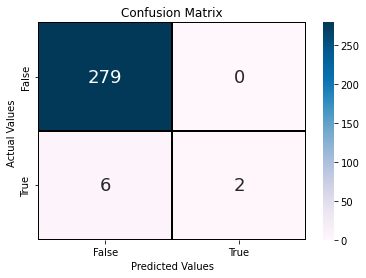

In [87]:
#Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

#Plotting the confusion matrix
ax = sns.heatmap(cm_knn, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [88]:
#Evaluation Strategy
TP_knn = cm_knn[1, 1]
TN_knn = cm_knn[0, 0]
FP_knn = cm_knn[0, 1]
FN_knn = cm_knn[1, 0]

# 1.  Sensitivity
sensitivity_knn = TP_knn / float(TP_knn + FN_knn)
print("Sensitivity:",sensitivity_knn)

# 2.  Specificity
specificity_knn = TN_knn / float(TN_knn + FP_knn)
print("Specificity:",specificity_knn)

# 3.  Precision
precision_knn = TP_knn / float(TP_knn + FP_knn)
print("Precision:",precision_knn)

# 4.  Accuracy
accuracy_knn = (TP_knn + TN_knn) / float(TP_knn + TN_knn + FN_knn + FP_knn)
print("Accuracy:",accuracy_knn)

Sensitivity: 0.25
Specificity: 1.0
Precision: 1.0
Accuracy: 0.9790940766550522


#### **DecisionTree Classifier**

In [89]:
#Making DecisionTree Classifier Model
dtree = DecisionTreeClassifier()
start = time.time()
dtree.fit(X_train, y_train)
stop = time.time()
dtree_time = f"{stop - start}"

In [90]:
#Making predictions on test data
y_pred_dtree = dtree.predict(X_test)

#Displaying the predictions
y_pred_dtree

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=uint8)

In [91]:
#AUC Score
auc_score_dtree = roc_auc_score(y_test, dtree.predict(X_test))
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_dtree)

AUC Score: 1.0


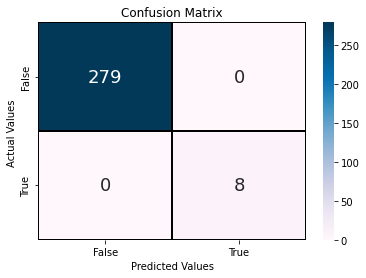

In [92]:
#Confusion Matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

#Plotting the confusion matrix
ax = sns.heatmap(cm_dtree, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [93]:
#Evaluation Strategy
TP_dtree = cm_dtree[1, 1]
TN_dtree = cm_dtree[0, 0]
FP_dtree = cm_dtree[0, 1]
FN_dtree = cm_dtree[1, 0]

# 1.  Sensitivity
sensitivity_dtree = TP_dtree / float(TP_dtree + FN_dtree)
print("Sensitivity:",sensitivity_dtree)

# 2.  Specificity
specificity_dtree = TN_dtree / float(TN_dtree + FP_dtree)
print("Specificity:",specificity_dtree)

# 3.  Precision
precision_dtree = TP_dtree / float(TP_dtree + FP_dtree)
print("Precision:",precision_dtree)

# 4.  Accuracy
accuracy_dtree = (TP_dtree + TN_dtree) / float(TP_dtree + TN_dtree + FN_dtree + FP_dtree)
print("Accuracy:",accuracy_dtree)

Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Accuracy: 1.0


#### **Logistic Regression**

In [94]:
#Making LogisticRegression Model
classifier = LogisticRegression(random_state=0)
start = time.time()
classifier.fit(X_train,y_train)
stop = time.time()
log_time = f"{stop - start}"

In [95]:
#Making predictions on test data
y_pred_log = classifier.predict(X_test)

#Displaying the predictions
y_pred_log

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=uint8)

In [96]:
#AUC Score
auc_score_classifier = roc_auc_score(y_test, classifier.predict(X_test))
fpr_classifier, tpr_classifier, thresholds_classifier = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_classifier)

AUC Score: 0.9375


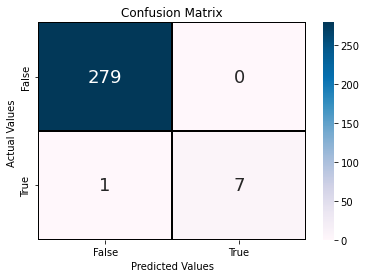

In [97]:
#Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)

#Plotting the confusion matrix
ax = sns.heatmap(cm_log, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [98]:
#Evaluation Strategy
TP_log = cm_log[1, 1]
TN_log = cm_log[0, 0]
FP_log = cm_log[0, 1]
FN_log = cm_log[1, 0]

# 1.  Sensitivity
sensitivity_log = TP_log / float(TP_log + FN_log)
print("Sensitivity:",sensitivity_log)

# 2.  Specificity
specificity_log = TN_log / float(TN_log + FP_log)
print("Specificity:",specificity_log)

# 3.  Precision
precision_log = TP_log / float(TP_log + FP_log)
print("Precision:",precision_log)

# 4.  Accuracy
accuracy_log = (TP_log + TN_log) / float(TP_log + TN_log + FN_log + FP_log)
print("Accuracy:",accuracy_log)

Sensitivity: 0.875
Specificity: 1.0
Precision: 1.0
Accuracy: 0.9965156794425087


#### **Support Vector Machines (SVM)**

In [99]:
#Making Support Vector Machines (SVM) Model
svm = SVC(probability=True, kernel = 'linear')
start = time.time()
svm.fit(X_train, y_train)
stop = time.time()
svm_time = f"{stop - start}"

In [100]:
#Making predictions on test data
y_pred_svm = svm.predict(X_test)

#Displaying the predictions
y_pred_svm

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=uint8)

In [101]:
#AUC Score
auc_score_svm = roc_auc_score(y_test, svm.predict(X_test))
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
print("AUC Score:",auc_score_svm)

AUC Score: 1.0


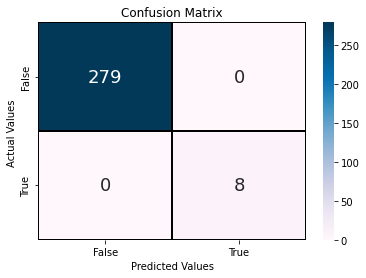

In [102]:
#Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

#Plotting the confusion matrix
ax = sns.heatmap(cm_svm, annot=True, annot_kws={"fontsize":18}, cmap='PuBu', fmt='.3g', linewidths=1, linecolor='black')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [103]:
#Evaluation Strategy
TP_svm = cm_svm[1, 1]
TN_svm = cm_svm[0, 0]
FP_svm = cm_svm[0, 1]
FN_svm = cm_svm[1, 0]

# 1.  Sensitivity
sensitivity_svm = TP_svm / float(TP_svm + FN_svm)
print("Sensitivity:",sensitivity_svm)

# 2.  Specificity
specificity_svm = TN_svm / float(TN_svm + FP_svm)
print("Specificity:",specificity_svm)

# 3.  Precision
precision_svm = TP_svm / float(TP_svm + FP_svm)
print("Precision:",precision_svm)

# 4.  Accuracy
accuracy_svm = (TP_svm + TN_svm) / float(TP_svm + TN_svm + FN_svm + FP_svm)
print("Accuracy:",accuracy_svm)

Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Accuracy: 1.0


#### **ROC Curve**

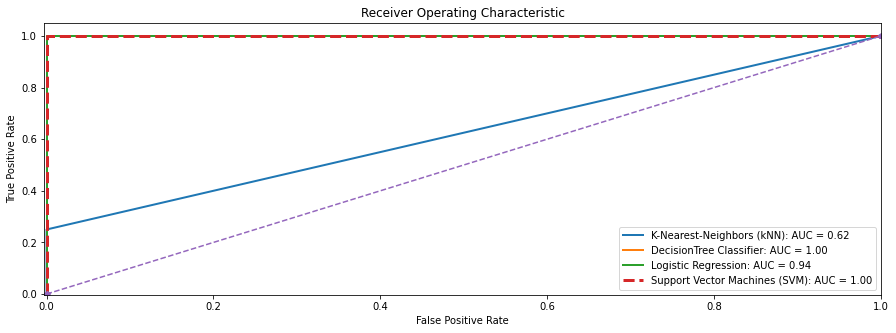

In [104]:
#Plotting the ROC Curve
plt.figure(figsize=(15,5))
plt.plot(fpr_knn, tpr_knn, label='K-Nearest-Neighbors (kNN): AUC = %0.2f' % auc_score_knn, linewidth=2)
plt.plot(fpr_dtree, tpr_dtree, label='DecisionTree Classifier: AUC = %0.2f' % auc_score_dtree, linewidth=2)
plt.plot(fpr_classifier, tpr_classifier, label='Logistic Regression: AUC = %0.2f' % auc_score_classifier, linewidth=2)
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machines (SVM): AUC = %0.2f' % auc_score_svm, linewidth=3, linestyle='dashed')
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([-0.003, 1.0])
plt.ylim([-0.003, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

## **Evaluation Metrics**

In [105]:
#Evaluation Metrics for different models
columns = ['Model', 'Sensitivity', 'Specificity', 'Precision', 'Accuracy', 'Running Time(s)']
evaluation_met = pd.DataFrame(columns=columns)

evaluation_met['Model'] = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'Logistic Regression', 'SVM(linear)']
evaluation_met['Sensitivity'] = [sensitivity_knn, sensitivity_dtree, sensitivity_log, sensitivity_svm]
evaluation_met['Specificity'] = [specificity_knn, specificity_dtree, specificity_log, specificity_svm]
evaluation_met['Precision'] = [precision_knn, precision_dtree, precision_log, precision_svm]
evaluation_met['Accuracy'] = [accuracy_knn, accuracy_dtree, accuracy_log, accuracy_svm]
evaluation_met['Running Time(s)'] = [knn_time, dtree_time, log_time, svm_time]

evaluation_met

,Model,Sensitivity,Specificity,Precision,Accuracy,Running Time(s)
0,KNeighborsClassifier,0.250,1.0,1.0,0.979094,0.0010581016540527344
1,DecisionTreeClassifier,1.000,1.0,1.0,1.000000,0.002351999282836914
2,Logistic Regression,0.875,1.0,1.0,0.996516,0.054990530014038086
3,SVM(linear),1.000,1.0,1.0,1.000000,0.09763121604919434
